In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
# 拟合fit方法，要求x的数据必须是二维数据集2
#下面的x是一维数组，如果想要变成二维，可以用reshape（）
#将x转换为二维数据，以便在sklearn中使用
x=np.arange(0,100,0.1)
y=5*x-4
x=x.reshape(len(x),1 )


#机器学习库，提供机器学习算法
# 创建一个名为lr的线性回归对象。
lr=LinearRegression()
#拟合,根据现有的数据集，建立模型，找出x与y之间的关系（方程式or函数） 
#注意，拟合fit方法，要求x的数据必须是二维数据集
lr.fit(x,y)
print(lr.coef_,lr.intercept_)
#ŷ=w₀+w₁*x 中，w₁被称为权重，w₀被称为偏置或截距
# coef:权重，可理解为系数
# intercepte:截距
print(lr.coef_)
# 上面这一步在输出权重w₁，当有多个x时，就有多个权重
print(lr.intercept_)
# 上面这一步在输出截距w₀，不能


[5.] -3.9999999999999716
[5.]
-3.9999999999999716


改变数据，让数据不那么完美，即x与y 之间不是严格的函数映射关系

此时可以引入np.random.normal()函数 也就是引入随机的一组正态分布的数据

normal(loc=0.0,scale=1.0,size=None) loc：均值，scale：标准差

In [9]:

noise=np.random.normal(0,1.2,len(x))
x=np.arange(0,100,0.1)
y=5*x-4+noise
x=x.reshape(len(x),1)
lr=LinearRegression()
lr.fit(x,y)
print(lr.coef_)# 这里输出的coef_ 是一个数组
print(lr.intercept_)

[5.00132843]
-4.052197155363984


以上这段代码中，lr.coef_输出的是线性回归模型的系数，是一个数组形式的结果。其原因是，当输入特征为多个时，即存在多个自变量时，线性回归模型的系数也会有多个，因此需要以数组的形式输出。

在这里，x是一个包含1000个元素的一维数组，经过reshape方法重塑为一个1000行1列的二维数组，表示1000个样本和1个自变量。因此，线性回归模型需要拟合一个包含1个自变量的模型，因此模型的系数也只有1个。但是，为了保持一致性，LinearRegression对象的coef_属性始终返回一个数组，其中包含拟合模型的所有系数，即使只有一个自变量。

在这里，由于只有一个自变量，因此数组中只包含一个元素，即模型的系数。因此，可以通过lr.coef_[0]或lr.coef_.item()来提取这个系数。同理，lr.intercept_输出的是模型的截距，也是一个数组形式的结果，即使只有一个截距。在这种情况下，可以通过lr.intercept_[0]或lr.intercept_.item()来提取截距的值。

当拟合之后，回归方程就确定了，就可以对未知的x实现预测任务

In [10]:
# 自己预测
unknown_x=101
w0 = lr.intercept_
w1 = lr.coef_[0]  # coef_ 是一个数组，所以拿出数组中第一个数据
y_hat = w0 + w1 *unknown_x #这一步就相当于lr.predict的功能
print(y_hat)

501.08197395525724


使用模型预测
根据给定的x数据,返回预测结果。要求:x必须是二维数据


In [13]:
#用模型预测
#根据给定的x 数据，返回预测结果。
# unknown—_x必须是二维数组，
# 所以要把已给出的unknown——x变成二维数据，
# 就在他外面加两个中括号
y_hat = lr.predict([[unknown_x]])
print(y_hat[0])

501.08197395525724


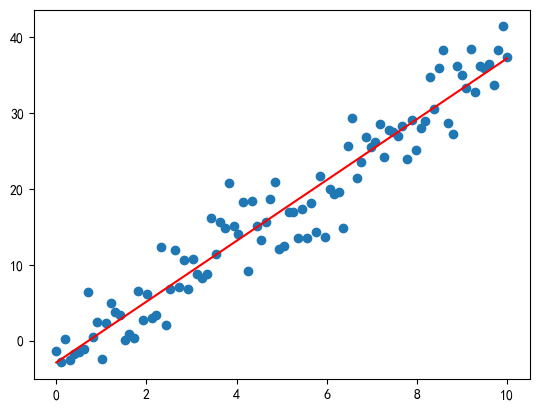

In [15]:
import matplotlib.pyplot as plt
#plt.rcParams['font.family']='SimHei': 
# 设置Matplotlib绘图库中的字体族为"SimHei"，即中文黑体字体，
# 以便在绘制中文字符时使用。
plt.rcParams['font.family']='SimHei'
#plt.rcParams['axes.unicode_minus']=False: 
# 设置Matplotlib绘图库中的坐标轴负号显示为负号（即"-"符号），
# 而不是Unicode中的减号（即"–"符号），以便在绘制负数数值时使用。
plt.rcParams['axes.unicode_minus']=False
#在指定区间之内，生成等差数列
x=np.linspace(0,10,100) 
#标准差越大，数据越分散，后面加的随机数是噪声
y=4*x-3+np.random.normal(0,3.5,len(x))
plt.scatter(x,y)
lr=LinearRegression()
#使用线性回归对象lr对数据进行拟合，
# 其中np.reshape(x,len(x),1)将一维数组x重塑为列向量，
# 以便与y进行拟合。
## 以下这一句，在reshape参数里容易写错，要注意
#np.reshape(x,(len(x),1))：是一个Numpy数组的方法，
# 用于将数组x重塑为一个形状为(len(x),1)的列向量，
# 以便与目标变量y进行拟合。
lr.fit(np.reshape(x,(len(x),1)),y)
# 从线性回归模型中提取截距和系数，以便进行预测。
w0=lr.intercept_
w1=lr.coef_[0]
#根据拟合的线性回归模型，
# 生成一个包含100个元素的一维数组y_hat，
# 中每个元素都是根据x和拟合参数w0和w1计算得到的预测值。
# 这两种计算方式等价，只是使用了不同的函数。
y_hat=w1*x+w0
y_hat=lr.predict(np.reshape(x,(len(x),1)))
#绘制一个曲线，其中x轴坐标为x，y轴坐标为y_hat，
# 曲线颜色为红色，用于可视化线性回归模型拟合的结果。
plt.plot(x,y_hat,c='r')

过程解析


练习
1.把真实值和预测值用matplotlib输出一下

In [ ]:
import numpy as np
import pandas  as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

x=np.arange(0,100,0.1)
noise=np.random.normal(0,2,len(x))
y=12+6.7*x+noise
x=x.reshape(len(x),1)

lr=LinearRegression()
lr.fit(x,y)
print(lr.coef_)
print(lr.intercept_)
plt.rcParams['font.family']='SimHei'
plt.rcParams['axes.unicode_minus']=False

print(plt.plot(x,y))

In [ ]:
plt.scatter(x,y)

In [ ]:
unknown_x=101
w0,w1=lr.intercept_,lr.coef_
y_hat=w0+w1*unknown_x
print(y_hat)
y_hat=lr.predict([[unknown_x]])
print(y_hat[0])

plt.scatter([[unknown_x]],y_hat)

In [ ]:
#老师讲解版本
import matplotlib.pyplot as plt
plt.rcParams['font.family']='SimHei'
plt.rcParams['axes.unicode_minus']=False
# x=np.arange(0,10,100)
#在指定区间之内，生成等差数列
x=np.linspace(0,10,100) # 这时的x 还是一维的
noise=np.random.normal(0,2.3,len(x))
y=5*x-7.7+noise
plt.scatter(x,y)

#画拟合线
lr=LinearRegression()
x_=np.reshape(x,(len(x),1))
lr.fit(x_,y)
#得到y_hat结果，方法一
w0=lr.intercept_
w1=lr.coef_[0]
y_hat=w0+w1*x
#得到y_hat结果，方法二
# y_hat=lr.predict(x_)
plt.plot(x,y_hat)  # 这时的线还都是蓝色的，和点的颜色一样
plt.plot(x,y_hat,c='r')  # 把线的颜色改成红色v

## 切分数据集

我们的目的，不应该只是让模型在现有的数据中表现优秀，更重要的是，模型也应该能够适用于未知的
数据，即模型在未知数据中，同样能够具有不错的预测能力，我们将这种行为称为模型的泛化能力。
为了能够验证模型的泛化能力，我们需要将现有的数据集分成两个部分：

训练集：用于训练模型，求解出最佳参数值（参数估计），要将大部分的样本分给训练集。

测试集：用于验证模型的泛化能力。

In [17]:
from sklearn.model_selection import train_test_split
# 这段代码中生成等差数列x是为了构造一个具有一定规律的数据集，
# 以便演示线性回归模型的拟合和预测过程。
x=np.linspace(0,10,10)
# 生成一个包含10个元素的一维数组y，
# 其中每个元素都是4倍的x减去3再加上一个服从正态分布的噪声，
# 以模拟真实数据。
y=4*x-3+np.random.normal(0,3.5,len(x))
#将数据集x和y分别划分为训练集和测试集，
# 其中测试集的大小为30%。函数返回四个数组：
# - x_train: 训练集的输入特征。
# x_test: 测试集的输入特征。
# y_train: 训练集的目标变量。
# y_test: 测试集的目标变量。
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

lr=LinearRegression()

# 使用线性回归对象lr对训练集进行拟合，
# 其中x_train.reshape(-1,1)将训练集的输入特征重塑为列向量，
# 以便与目标变量y_train进行拟合。
# reshape可以指定-1，表示根据其他维度的长度，自动计算当前的维度
lr.fit(x_train.reshape(-1,1),y_train)

#使用拟合好的线性回归模型对测试集进行预测，
# 其中x_test.reshape(-1,1)
# 将测试集的输入特征重塑为列向量，以便进行预测。
y_hat=lr.predict(x_test.reshape(-1,1))



综上所述，上面这段代码主要是使用Scikit-learn中的train_test_split函数将数据集分为训练集和测试集，并使用线性回归模型对训练集进行拟合和测试集进行预测，以评估模型的性能。这种方法可以评估模型在未见过的数据上的表现，并避免模型过度拟合训练数据。在训练模型时，只使用训练集对模型进行拟合，而不使用测试集；在测试模型时，使用测试集对模型进行预测，并计算预测结果与实际结果之间的误差。最终，可以根据测试集上的误差评估模型的性能，并对模型进行调整和改进。

自己练习过程

In [20]:
#生成一个正太分布的干扰项（噪音）
from sklearn.model_selection import train_test_split
x=np.linspace(0,10,10)
y=x*4-3+np.random.normal(0,3.5,len(x))
train_test_split(x,y,test_size=0.3)
# 切分的函数默认有一个洗牌的功能，不会按照数组的顺序进行切分
# 如果不想洗牌，就添加一个shuffle = False 的参数，具体如下
train_test_split(x,y,test_size=0.3,shuffle= False)

[array([0.        , 1.11111111, 2.22222222, 3.33333333, 4.44444444,
        5.55555556, 6.66666667]),
 array([ 7.77777778,  8.88888889, 10.        ]),
 array([-4.34862107, -0.58683813,  3.62718098, 11.20337963, 14.71086938,
        18.39486545, 23.95009047]),
 array([32.22444852, 38.79887993, 36.57331953])]

参数总结
1.shuffle：用来指定是否进行洗牌操作，默认值为True
2.random_state: 随机种子，用来控制随机行为，随机种子相同，随机洗牌的顺序就相同
演示如下

In [22]:
train_test_split(x,y,test_size=0.3,random_state=1)
# 第一种结果 和第二种结果一样，因为随机种子一样，把洗牌的行为控制住了
#[array([4.44444444, 0.        , 3.33333333, 1.11111111, 7.77777778,
#         8.88888889, 5.55555556]),
#  array([ 2.22222222, 10.        ,  6.66666667]),
#  array([14.71086938, -4.34862107, 11.20337963, -0.58683813, 32.22444852,
#         38.79887993, 18.39486545]),
#  array([ 3.62718098, 36.57331953, 23.95009047])]
# 第二种结果
# [array([4.44444444, 0.        , 3.33333333, 1.11111111, 7.77777778,
#         8.88888889, 5.55555556]),
#  array([ 2.22222222, 10.        ,  6.66666667]),
#  array([14.71086938, -4.34862107, 11.20337963, -0.58683813, 32.22444852,
#         38.79887993, 18.39486545]),
#  array([ 3.62718098, 36.57331953, 23.95009047])]


[array([4.44444444, 0.        , 3.33333333, 1.11111111, 7.77777778,
        8.88888889, 5.55555556]),
 array([ 2.22222222, 10.        ,  6.66666667]),
 array([14.71086938, -4.34862107, 11.20337963, -0.58683813, 32.22444852,
        38.79887993, 18.39486545]),
 array([ 3.62718098, 36.57331953, 23.95009047])]

练习
根据家庭电流数据集，使用全局有用功率（x）与全局电流（y）建立简单线性回归。

global_active_power：全局有用功率。

Global_intensity：全局电流。

注意：数据中存在缺失值（?表示缺失）